# Plots
<hr style="clear:both">

This notebook presents and displays our plot illustrating out story.

**Project Mentor:** [Shuo Wen](http://personnes.epfl.ch/shuo.wen) ([Email](shuo.wen@epfl.ch)),
**Authors:** Mahmoud Dokmak, Matthieu Borello, Léo Brunneau, Loïc Domingos, Bastien Armstrong

<hr style="clear:both">

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')


In [23]:
movies = pd.read_pickle('./data/Success_Metric.pkl')
movies.head()

freebase_movie_id imdb_id  item_id                        movie_name  \
30973         /m/083skw  031381      NaN                Gone with the Wind   
9888           /m/0k4d7  029583      NaN   Snow White and the Seven Dwarfs   
1036         /m/04j1zjw  034492      NaN                             Bambi   
66323          /m/0dtfn  076759      NaN  Star Wars Episode IV: A New Hope   
18216          /m/0dr_4  120338   1721.0                           Titanic   

      combined_release_date  Box_Office  \
30973            1939-12-15    0.143767   
9888             1937-12-21    0.149518   
1036             1942-08-14    0.096125   
66323            1977-05-25    0.278692   
18216            1997-11-18    0.785462   

       inflation_adjusted_box_office_revenue     movie_countries_final  \
30973                               0.996126  United States of America   
9888                                1.000000  United States of America   
1036                                0.567962  United States of America   
66323                               0.442916  United States of America   
18216                               0.471324  United States of America   

                                      movie_genres_final  sa_score  \
30973  [Film adaptation, Costume drama, Roadshow thea...  0.619947   
9888   [Romance Film, Musical, Fantasy, Family Film, ...  0.619947   
1036   [Adventure, Children's/Family, Animation, Comi...  0.619947   
66323  [Science Fiction, Adventure, Fantasy, Coming o...  0.619947   
18216  [Tragedy, Costume drama, Historical fiction, A...  0.592075   

       popularity    rating  success_score  success_metric_scaled  
30973         1.0  0.785789      22.186218               5.000000  
9888          1.0  0.696421      21.949103               4.944015  
1036          1.0  0.684211      18.456170               4.119294  
66323         1.0  0.810947      17.836009               3.972866  
18216         1.0  0.714080      17.689057               3.938169

This hexbin plot display the number of successful movie (acording to our metric) across the years

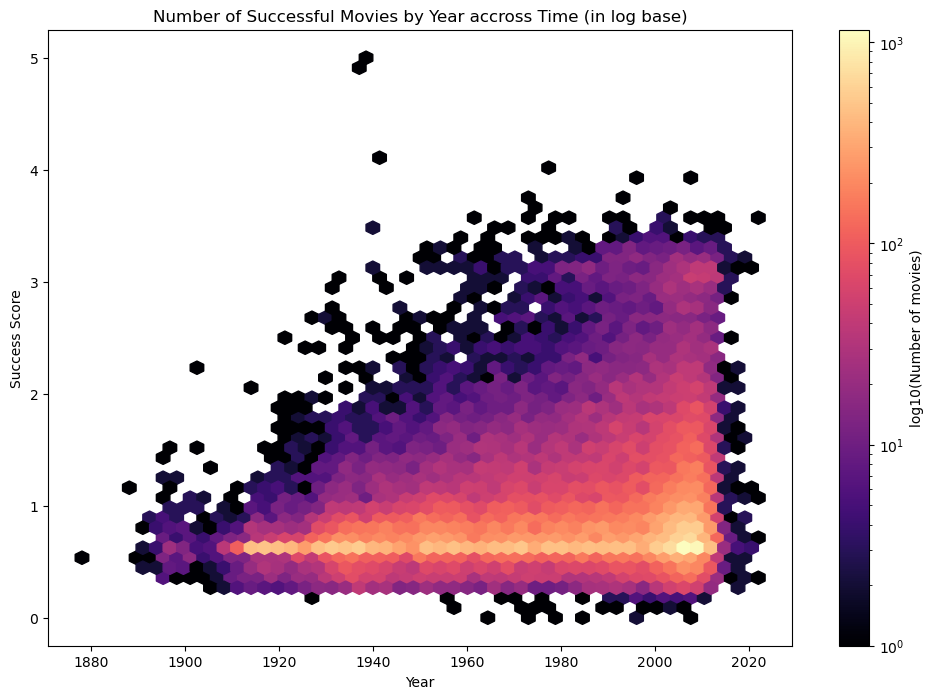

In [21]:
# Create a copy to not modify our final dataframe
# Keeping only the year as we are looking at year distribution
success_by_year = movies.copy()
success_by_year['year'] = pd.to_datetime(success_by_year['combined_release_date']).dt.year
plt.figure(figsize=(12, 8))
plt.hexbin(success_by_year['year'], success_by_year['success_metric_scaled'],gridsize=50,cmap='magma',bins='log')
plt.colorbar(label='log10(Number of movies)')
plt.xlabel('Year')
plt.ylabel('Success Score')
plt.title('Movies Success by Year (in log base)')
plt.show()

This plot represent the number of movies of a particular genre was released each year.

In [35]:
n_genre_per_year = movies.copy()
# Year analysis
n_genre_per_year['year'] = n_genre_per_year['combined_release_date'].dt.year
# Because each movie has a list of genre, we get them the following way
n_genre_per_year['movie_genres_final'] = n_genre_per_year['movie_genres_final'].apply(lambda x: x.split(', ') if isinstance(x, str) else x)
n_genre_per_year = n_genre_per_year.explode('movie_genres_final')
# Group by genre and year, calculating the number of movies per genre per year
n_genre_per_year = n_genre_per_year.groupby(['year', 'movie_genres_final']).size().reset_index(name='movie_count')
# Count the number of occurences
#n_genre_per_year['count'] = n_genre_per_year['movie_genres_final'].value_counts()
#n_genre_per_year = n_genre_per_year.sort_values(by='count', ascending=False)
n_genre_per_year




year movie_genres_final  movie_count
0      1878         Short Film            1
1      1878        Silent film            1
2      1888    Black-and-white            1
3      1888              Indie            1
4      1888         Short Film            1
...     ...                ...          ...
14158  2022              Drama            2
14159  2022            Fantasy            1
14160  2022              Indie            1
14161  2022    Science Fiction            1
14162  2022         Short Film            1

[14163 rows x 3 columns]

In [33]:
# Create the interactive plot
fig = px.line(n_genre_per_year, x='year', y='movie_count', color='movie_genres_final', 
              title="Movies Count by Genre Over Time",
              labels={'year': 'Release Year', 'movie_count': 'Number of Movies'},
              line_shape='linear')

# Show the plot
fig.show()

In [29]:


# Extract year from the release date
movies['year'] = pd.to_datetime(movies['combined_release_date']).dt.year

# Handle genres and explode them
movies['movie_genres_final'] = movies['movie_genres_final'].apply(lambda x: x.split(', ') if isinstance(x, str) else x)
n_genre_per_year = movies.explode('movie_genres_final')

# Group by year and genre to count the number of movies per genre per year
n_genre_per_year = n_genre_per_year.groupby(['year', 'movie_genres_final']).size().reset_index(name='movie_count')
# Create the interactive plot
fig = px.line(n_genre_per_year, x='year', y='movie_count', color='movie_genres_final', 
              title="Movies Count by Genre Over Time",
              labels={'year': 'Release Year', 'movie_count': 'Number of Movies'},
              line_shape='linear')

# Customize the legend to allow the selection of only one genre at a time
fig.update_layout(
    legend=dict(
        itemclick="toggleothers",  # This makes sure only one genre is shown at a time
    )
)

# Show the plot
fig.show()


In [36]:
# Extract year from the release date
movies['year'] = pd.to_datetime(movies['combined_release_date']).dt.year

# Handle genres and explode them
movies['movie_genres_final'] = movies['movie_genres_final'].apply(lambda x: x.split(', ') if isinstance(x, str) else x)
n_genre_per_year = movies.explode('movie_genres_final')

# Count the occurrences of each genre
genre_counts = n_genre_per_year['movie_genres_final'].value_counts()

# Sort genres by frequency in descending order
sorted_genres = genre_counts.index.tolist()

# Convert 'movie_genres_final' to a categorical type with the order based on frequency
n_genre_per_year['movie_genres_final'] = pd.Categorical(n_genre_per_year['movie_genres_final'], categories=sorted_genres, ordered=True)

# Group by year and genre to count the number of movies per genre per year
n_genre_per_year = n_genre_per_year.groupby(['year', 'movie_genres_final']).size().reset_index(name='movie_count')

# Create the interactive plot
fig = px.line(n_genre_per_year, x='year', y='movie_count', color='movie_genres_final', 
              title="Movies Count by Genre Over Time",
              labels={'year': 'Release Year', 'movie_count': 'Number of Movies'},
              line_shape='linear')

# Customize the legend to allow the selection of only one genre at a time
fig.update_layout(
    legend=dict(
        itemclick="toggleothers",  # This makes sure only one genre is shown at a time
    )
)

# Show the plot
fig.show()


/var/folders/ft/f5drds915nl_7p2g4tg67z840000gn/T/ipykernel_79874/2170055145.py:18: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [38]:



# Extract year from the release date
movies['year'] = pd.to_datetime(movies['combined_release_date']).dt.year

# Handle genres and explode them
movies['movie_genres_final'] = movies['movie_genres_final'].apply(lambda x: x.split(', ') if isinstance(x, str) else x)
n_genre_per_year = movies.explode('movie_genres_final')

# Count the occurrences of each genre
genre_counts = n_genre_per_year['movie_genres_final'].value_counts()

# Select only the top 15 most frequent genres
top_15_genres = genre_counts.head(15).index.tolist()

# Filter the dataset to keep only movies that belong to the top 15 genres
n_genre_per_year = n_genre_per_year[n_genre_per_year['movie_genres_final'].isin(top_15_genres)]

# Reorder 'movie_genres_final' based on frequency of occurrence
n_genre_per_year['movie_genres_final'] = pd.Categorical(n_genre_per_year['movie_genres_final'], categories=top_15_genres, ordered=True)

# Group by year and genre to count the number of movies per genre per year
n_genre_per_year = n_genre_per_year.groupby(['year', 'movie_genres_final']).size().reset_index(name='movie_count')

# Create the interactive plot
fig = px.line(n_genre_per_year, x='year', y='movie_count', color='movie_genres_final', 
              title="Top 15 Movies Count by Genre Over Time",
              labels={'year': 'Release Year', 'movie_count': 'Number of Movies'},
              line_shape='linear')

# Customize the legend to allow the selection of only one genre at a time
fig.update_layout(
    legend=dict(
        itemclick="toggleothers",  # This makes sure only one genre is shown at a time
    )
)

# Show the plot
fig.show()


/var/folders/ft/f5drds915nl_7p2g4tg67z840000gn/T/ipykernel_79874/3866424841.py:21: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [45]:

# Extract year from the release date
movies['year'] = pd.to_datetime(movies['combined_release_date']).dt.year

# Handle genres and explode them
movies['movie_genres_final'] = movies['movie_genres_final'].apply(lambda x: x.split(', ') if isinstance(x, str) else x)
n_genre_per_year = movies.explode('movie_genres_final')

# Count the occurrences of each genre
genre_counts = n_genre_per_year['movie_genres_final'].value_counts()

# Select only the top 15 most frequent genres
top_15_genres = genre_counts.head(20).index.tolist()

# Filter the dataset to keep only movies that belong to the top 15 genres
n_genre_per_year = n_genre_per_year[n_genre_per_year['movie_genres_final'].isin(top_15_genres)]

# Reorder 'movie_genres_final' based on frequency of occurrence
n_genre_per_year['movie_genres_final'] = pd.Categorical(n_genre_per_year['movie_genres_final'], categories=top_15_genres, ordered=True)

# Group by year and genre to count the number of movies per genre per year
n_genre_per_year = n_genre_per_year.groupby(['year', 'movie_genres_final']).size().reset_index(name='movie_count')

# Create the interactive plot with increased size
fig = px.line(n_genre_per_year, x='year', y='movie_count', color='movie_genres_final', 
              title="Top 15 Movies Count by Genre Over Time",
              labels={'year': 'Release Year', 'movie_count': 'Number of Movies'},
              line_shape='linear',
              width=900,   # Width of the plot
              height=600)   # Height of the plot

# Customize the legend to allow the selection of only one genre at a time
fig.update_layout(
    legend=dict(
        itemclick="toggleothers",  # This makes sure only one genre is shown at a time
    )
)

# Show the plot
fig.show()


/var/folders/ft/f5drds915nl_7p2g4tg67z840000gn/T/ipykernel_79874/1229641973.py:21: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

